In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from Joint3DLib import *
from scipy.optimize import curve_fit
from IPython.display import display, Math

%config InlineBackend.figure_formats = ['svg']

In [2]:
t_unit = "s"
v_unit = "mVpp"
T_unit = "K"
f_unit = "Hz"

In [3]:
# Define the relevant directories
path0 = "C:/Users/Admin/Desktop/3DJoint_DataAnalysis/"
erosion = "data_erosion/"
printed = "data_printed/"
printed_Al = "data_printed_Al/"

# Define a pattern to identify data files
pattern = '^[0-3][0-9]_[0-1][0-9].xlsx'

In [4]:
path = path0 + printed_Al

# this searches for files with the right pattern
files = []
for file in os.listdir(path):
    if re.match(pattern, file):
        files.append(file)

In [5]:
# Here we store the variables
Q = []
errQ = []
T = []
errT = []
chisq = []
V0 = []

In [6]:
# Loop over all data
for file in files:
    day = pd.ExcelFile(path+file)
    sheets = day.sheet_names
    for sheet in sheets:
        data = pd.read_excel(day, sheet_name = sheet)
        q, errq, t, errt, chi = fitSheet(path+file, sheet, initial = [300, 50])
        Q.append(q)
        errQ.append(errq)
        T.append(t)
        errT.append(errt)
        chisq.append(chi)
        V0.append(data['Voltage'][0]) 

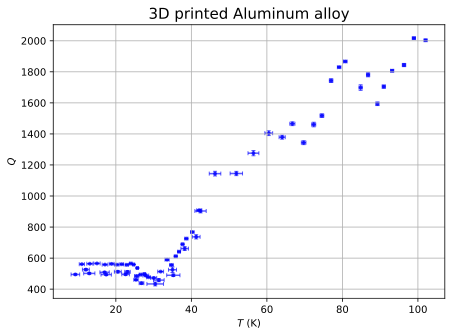

In [7]:
fig = plotQ(Q, errQ, T, errT, '3D printed Aluminum alloy')

In [8]:
# Loop over all data
# for file in files:
#     day = pd.ExcelFile(path+file)
#     sheets = day.sheet_names
#     for sheet in sheets:
#         data = pd.read_excel(day, sheet_name = sheet)
#         plotSheet(path+file, sheet, initial = [300, 50])

In [9]:
Q = np.asarray(Q)
errQ = np.asarray(errQ)
T = np.asarray(T)
errT = np.asarray(errT)
chisq = np.asarray(chisq)
V0 = np.asarray(V0)

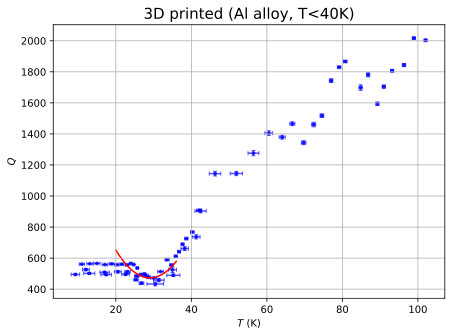

In [10]:
cut = (T>23) & (T<36)
z = np.polyfit(T[cut], Q[cut], 2)
x = np.linspace(20, 36, 100)
poly = np.poly1d(z)
plotQ(Q, errQ, T, errT, "3D printed (Al alloy, T<40K)")
plt.plot(x, poly(x), color = 'red', zorder = 1);